In [66]:
!pip install scikit-image


In [67]:
# import libraries
import pandas as pd
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from skimage import color, exposure
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern

# train test split
from sklearn.model_selection import train_test_split


1- Loading the dataset

In [18]:
import gdown
gdown.download("https://drive.google.com/file/d/1YUbTBFrk9QF0ivR5F640G3dhCMC3XQUZ/view?usp=sharing", "dataset.zip", quiet=False, fuzzy=True)
gdown.extractall("dataset.zip")

Downloading...
From (original): https://drive.google.com/uc?id=1YUbTBFrk9QF0ivR5F640G3dhCMC3XQUZ
From (redirected): https://drive.google.com/uc?id=1YUbTBFrk9QF0ivR5F640G3dhCMC3XQUZ&confirm=t&uuid=89d86a71-ae13-420c-b404-41e9f2ebf8ee
To: /content/dataset.zip
100%|██████████| 1.70G/1.70G [00:27<00:00, 61.3MB/s]


['dataset/',
 'dataset/flooded/',
 'dataset/flooded/0.jpg',
 'dataset/flooded/1.jpg',
 'dataset/flooded/10.jpg',
 'dataset/flooded/100.jpg',
 'dataset/flooded/101.jpg',
 'dataset/flooded/102.jpg',
 'dataset/flooded/103.jpg',
 'dataset/flooded/104.jpg',
 'dataset/flooded/105.jpg',
 'dataset/flooded/106.jpg',
 'dataset/flooded/107.jpg',
 'dataset/flooded/108.jpg',
 'dataset/flooded/109.jpg',
 'dataset/flooded/11.jpg',
 'dataset/flooded/110.jpg',
 'dataset/flooded/111.jpg',
 'dataset/flooded/112.jpg',
 'dataset/flooded/113.jpg',
 'dataset/flooded/114.jpg',
 'dataset/flooded/115.jpg',
 'dataset/flooded/116.jpg',
 'dataset/flooded/117.jpg',
 'dataset/flooded/118.jpg',
 'dataset/flooded/119.jpg',
 'dataset/flooded/12.jpg',
 'dataset/flooded/120.jpg',
 'dataset/flooded/121.jpg',
 'dataset/flooded/122.jpg',
 'dataset/flooded/123.jpg',
 'dataset/flooded/124.jpg',
 'dataset/flooded/125.jpg',
 'dataset/flooded/126.jpg',
 'dataset/flooded/127.jpg',
 'dataset/flooded/128.jpg',
 'dataset/flooded/129

In [22]:
# Set the Seaborn style to 'darkgrid' with custom parameters for axis face color and grid color
sns.set_style(style='darkgrid', rc={'axes.facecolor': '.9', 'grid.color': '.8'})

# Set the color palette to 'deep'
sns.set_palette(palette='deep')

# Retrieve the current color palette
sns_c = sns.color_palette(palette='deep')


In [21]:
# Create empty lists to store images and labels
images = []
labels = []

# Load images from the 'dataset' directory
for folder in os.listdir('dataset'):
    for file in os.listdir('dataset/' + folder):
        # Open the image file using PIL
        image = Image.open('dataset/' + folder + '/' + file)

        # Resize the image to (256, 256)
        image = image.resize((256, 256))

        # Convert the image to a NumPy array
        image = np.array(image)

        # Append the image to the 'images' list
        images.append(image)

        # Append the label (folder name) to the 'labels' list
        labels.append(folder)


In [23]:
classes = {'flooded': 1, 'non-flooded': 0}
inv_classes = {1: 'flooded', 0: 'non-flooded'}

labels = [classes[label] for label in labels]
images = np.array(images)
labels = np.array(labels)

In [26]:
# train test split
X_train_images, X_test_images, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

2- Preprocessing

In [9]:
'''
Why increase saturation?
1- Enhanced Visual Appearance
2- Feature Detection: By intensifying the colors, subtle variations in land cover, terrain, vegetation, or other features become easier to identify.
3- Improved Interpretation: by providing clearer distinctions between different land cover types, landforms, or other geographical features.
'''
def increase_saturation(image, factor=1.2):
    # Convert the image to HSV color space
    image = color.rgb2hsv(image)

    # Increase the saturation channel by the specified factor
    image[:, :, 1] = image[:, :, 1] * factor

    # Convert the image back to RGB color space
    image = color.hsv2rgb(image)

    # Scale the image values to the range [0, 255]
    image = image * 255

    # Convert the image to uint8 data type
    return image.astype("uint8")

In [10]:
'''
Why Gamma Correction?
1- Brightness Adjustment: to enhance the visibility of details.
By altering the gamma value, you can effectively brighten or darken the image.
2- Enhanced Contrast: This redistribution can make subtle features more distinguishable, aiding in the identification and analysis of various land cover types, terrain features.
'''
def gamma_correction(image, gamma=0.8):
    # Apply gamma correction to the input image
    image = exposure.adjust_gamma(image, gamma=gamma)
    return image


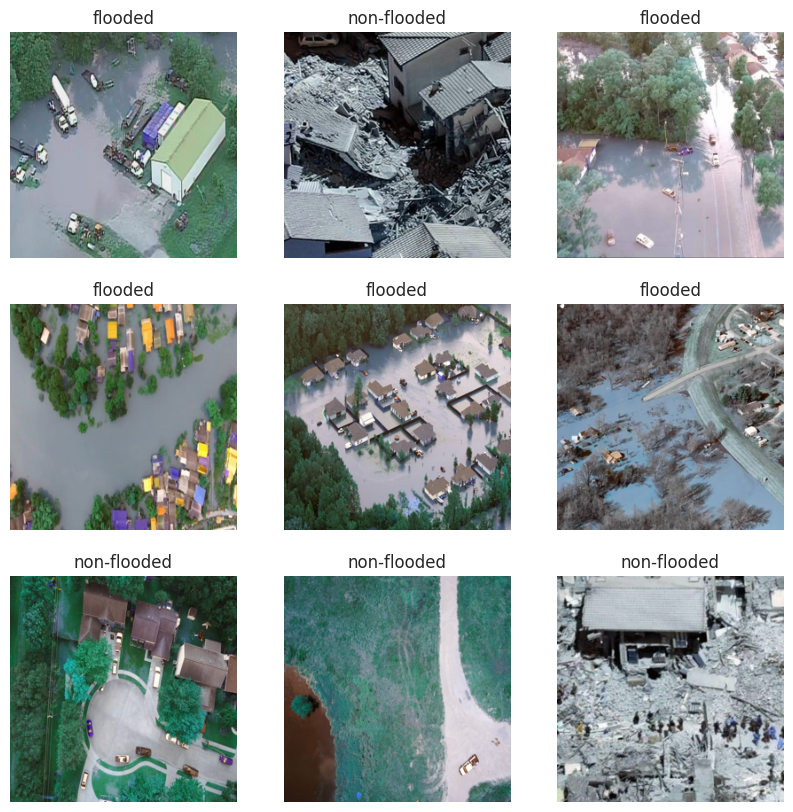

In [28]:
import matplotlib.pyplot as plt

# Create a new figure with a specified size
plt.figure(figsize=(10, 10))

# Iterate over the first 9 images in X_train_images
for i in range(9):
    # Create a subplot with 3 rows, 3 columns, and the i+1 index
    ax = plt.subplot(3, 3, i + 1)

    # Display the i-th image in X_train_images
    plt.imshow(X_train_images[i].astype("uint8"))

    # Set the title of the subplot to the corresponding class label
    plt.title(inv_classes[y_train[i]])

    # Turn off axis for better visualization
    plt.axis("off")

# Show the plot
plt.show()


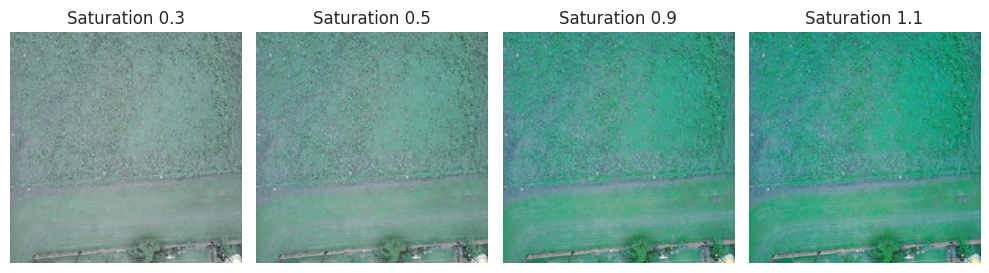

In [41]:
# Define values for saturation adjustment
values = [0.3, 0.5, 0.9, 1.1]

# Generate titles for the plots based on the saturation values
titles = ["Original" if value == 1 else f"Saturation {value}" for value in values]

# Plot the images with different saturation levels
plot_row(
    [increase_saturation(X_train_images[15], value) for value in values],
    titles
)


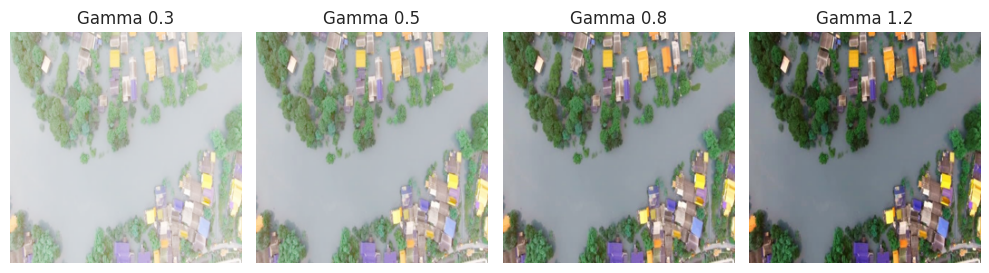

In [44]:
# Define values for gamma correction
values = [0.3, 0.5, 0.8, 1.2]

# Generate titles for the plots based on the gamma values
titles = ["Original" if value == 1 else f"Gamma {value}" for value in values]

# Plot the images with different gamma correction values
plot_row(
    [gamma_correction(X_train_images[3], value) for value in values],
    titles
)


## Investigate Colors Features

In [46]:
# get colors distribution for each class

# Extract images labeled as flooded (class 1) from the training dataset
flooded = X_train_images[y_train == 1]

# Extract images labeled as non-flooded (class 0) from the training dataset
non_flooded = X_train_images[y_train == 0]

# Calculate the average color distribution for flooded class
flooded_colors = []
for image in flooded:
    # Compute the mean RGB values across all pixels in the image
    flooded_colors.append(np.mean(image, axis=(0, 1)))
# Convert the list of average colors to a NumPy array
flooded_colors = np.array(flooded_colors)

# Calculate the average color distribution for non-flooded class
non_flooded_colors = []
for image in non_flooded:
    # Compute the mean RGB values across all pixels in the image
    non_flooded_colors.append(np.mean(image, axis=(0, 1)))
# Convert the list of average colors to a NumPy array
non_flooded_colors = np.array(non_flooded_colors)


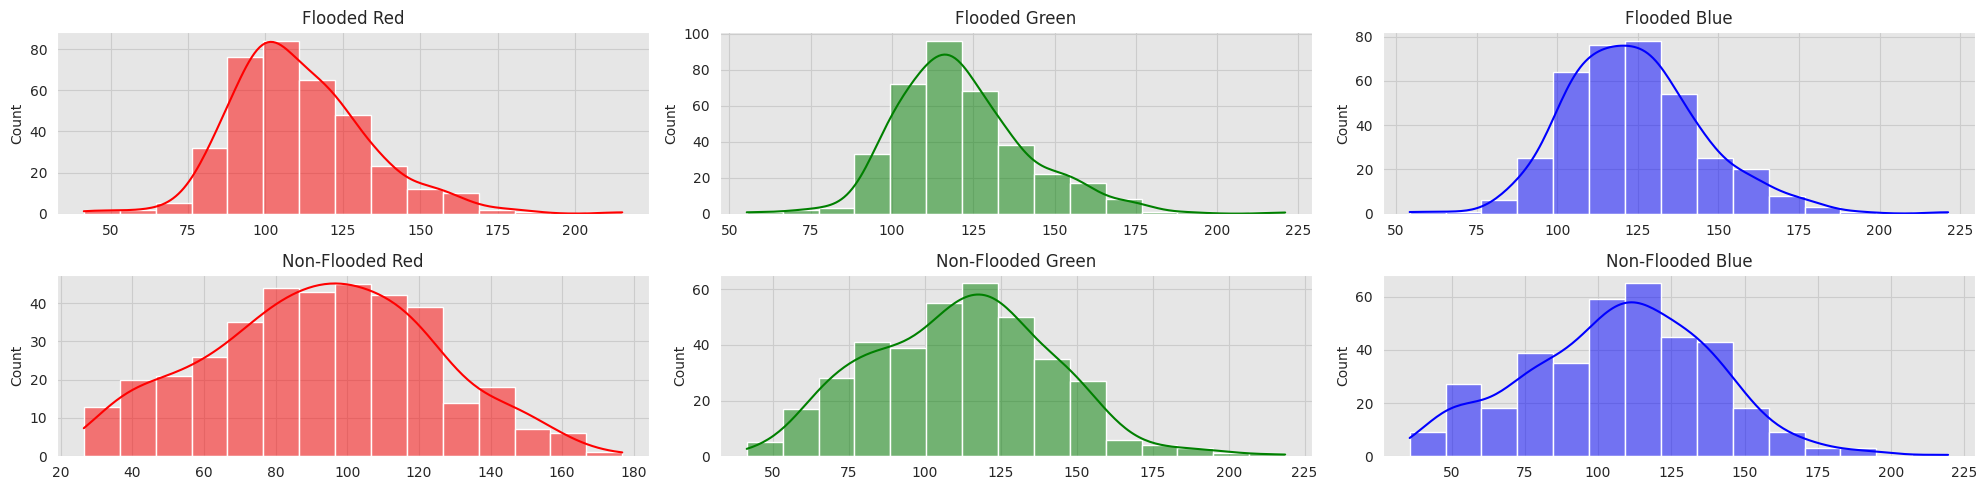

In [47]:
bins = 15  # Number of bins for histogram

# Create subplots grid with 2 rows and 3 columns
fig, ax = plt.subplots(2, 3, figsize=(20, 5))

# Plot histograms for flooded class - Red channel
sns.histplot(flooded_colors[:, 0], bins=bins, ax=ax[0, 0], color='red', kde=True)
# Plot histograms for flooded class - Green channel
sns.histplot(flooded_colors[:, 1], bins=bins, ax=ax[0, 1], color='green', kde=True)
# Plot histograms for flooded class - Blue channel
sns.histplot(flooded_colors[:, 2], bins=bins, ax=ax[0, 2], color='blue', kde=True)
# Plot histograms for non-flooded class - Red channel
sns.histplot(non_flooded_colors[:, 0], bins=bins, ax=ax[1, 0], color='red', kde=True)
# Plot histograms for non-flooded class - Green channel
sns.histplot(non_flooded_colors[:, 1], bins=bins, ax=ax[1, 1], color='green', kde=True)
# Plot histograms for non-flooded class - Blue channel
sns.histplot(non_flooded_colors[:, 2], bins=bins, ax=ax[1, 2], color='blue', kde=True)

# Set titles for each subplot
ax[0, 0].set_title('Flooded Red')
ax[0, 1].set_title('Flooded Green')
ax[0, 2].set_title('Flooded Blue')
ax[1, 0].set_title('Non-Flooded Red')
ax[1, 1].set_title('Non-Flooded Green')
ax[1, 2].set_title('Non-Flooded Blue')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plot
plt.show()


In [48]:
bins = 15  # Number of bins for histogram

# Initialize empty lists to store feature vectors for training and test images
X_train = []
X_test = []

# Generate feature vectors for training images
for image in X_train_images:
    # Compute histograms for the red, green, and blue channels
    red = np.histogram(image[:, :, 0], bins=bins)[0]
    green = np.histogram(image[:, :, 1], bins=bins)[0]
    blue = np.histogram(image[:, :, 2], bins=bins)[0]
    # Concatenate the histograms into a single feature vector and append to X_train
    X_train.append(np.concatenate((red, green, blue)))

# Convert the list of feature vectors to a NumPy array
X_train = np.array(X_train)

# Generate feature vectors for test images
for image in X_test_images:
    # Compute histograms for the red, green, and blue channels
    red = np.histogram(image[:, :, 0], bins=bins)[0]
    green = np.histogram(image[:, :, 1], bins=bins)[0]
    blue = np.histogram(image[:, :, 2], bins=bins)[0]
    # Concatenate the histograms into a single feature vector and append to X_test
    X_test.append(np.concatenate((red, green, blue)))

# Convert the list of feature vectors to a NumPy array
X_test = np.array(X_test)


In [58]:
# Initialize SVC model with a high regularization parameter (C=1000)
clf = SVC(C=500)

# Train the SVC model using the training data
clf.fit(X_train, y_train)

# Predict labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))  # Print accuracy score
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))  # Print F1 score


Accuracy: 0.8216216216216217
F1 Score: 0.8214337944953055


3- Features

In [72]:
"""
Compute the gray-level co-occurrence matrix (GLCM) of the image and extract features from it.
param image: The input image.
param distance: The distance between the two pixels.
param angles: The angles between the two pixels.
return: The GLCM features.
link to glcm: https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Faimonks%2Fgray-level-co-occurrence-matrix-glcm-a-comprehensive-analysis-a58bbc49c0f6&psig=AOvVaw0aPuyGcNmrn2vma4FX6cQE&ust=1714434126005000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCNielqyY5oUDFQAAAAAdAAAAABAE
"""
'''
Why GLCM?
1- Texture Discrimination: Satellite images often contain various textures representing different land cover types, geological formations, or surface conditions.
These texture features can help discriminate between different land cover classes and identify subtle patterns or changes within the imagery.
2- Spatial Context: GLCM considers the spatial arrangement of pixels within an image, capturing information about the relative positioning and interactions of neighboring pixels.
3- Quantitative Analysis: measures of texture complexity, roughness, and regularity within satellite images.
'''
def glcm_features(image, features=['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM'],
                  distance=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):

    # Convert the input image to grayscale
    image = color.rgb2gray(image)

    # Scale the pixel values to the range [0, 255] and convert to uint8
    image = image * 255
    image = image.astype('uint8')

    # Compute the Gray-Level Co-occurrence Matrix (GLCM) for the image
    glcm = graycomatrix(image, distances=distance, angles=angles)

    # Calculate the specified GLCM features
    calculate_features = []
    for feature in features:
        calculate_features.append(graycoprops(glcm, feature))

    # Create a dictionary to store the calculated features
    result = {}

    # Store the calculated features in the result dictionary
    for i in range(len(distance)):
        for j in range(len(angles)):
            for feature in range(len(features)):
                result[features[feature] + '_' + str(i) + '_' + str(j)] = calculate_features[feature][i, j]

    return result


In [73]:
# Initialize empty lists to store GLCM features for training and test images
X_train = []
X_test = []

# Generate GLCM features for training images
for image in X_train_images:
    # Calculate GLCM features for the current image
    features = glcm_features(image)
    # Append the calculated features to the list
    X_train.append(features)

# Convert the list of feature dictionaries to a pandas DataFrame for training data
X_train = pd.DataFrame(X_train)

# Generate GLCM features for test images
for image in X_test_images:
    # Calculate GLCM features for the current image
    features = glcm_features(image)
    # Append the calculated features to the list
    X_test.append(features)

# Convert the list of feature dictionaries to a pandas DataFrame for test data
X_test = pd.DataFrame(X_test)


In [80]:
# Initialize the Random Forest classifier with specified parameters
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=48)

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
print('Accuracy:', accuracy_score(y_test, y_pred))  # Print accuracy score
print('F1 Score:', f1_score(y_test, y_pred, average='micro'))  # Print F1 score


Accuracy: 0.8378378378378378
F1 Score: 0.8378378378378378


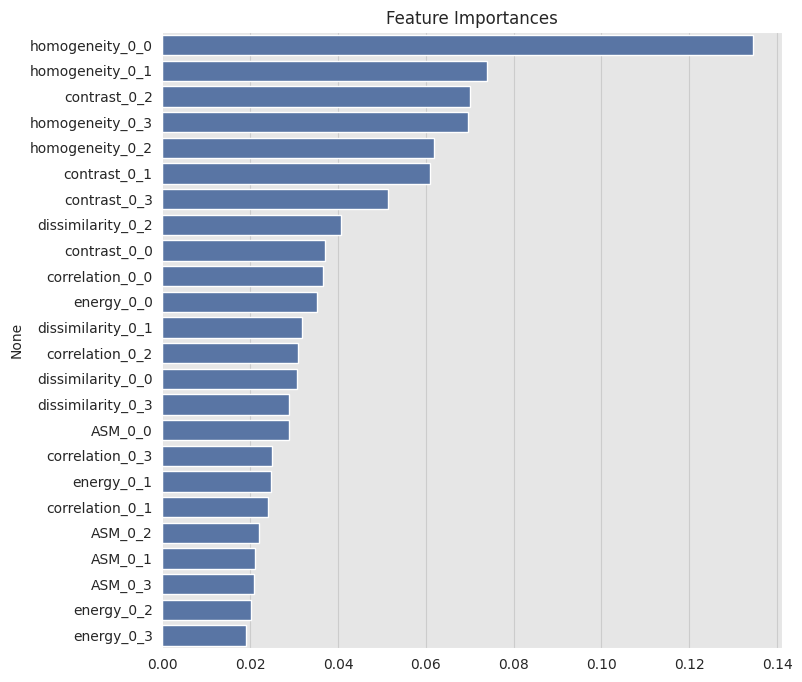

In [81]:
# Calculate feature importances
importances = clf.feature_importances_

# Get indices of features sorted by importance in descending order
indices = np.argsort(importances)[::-1]

# Get feature names
features = X_train.columns

# Create a horizontal bar plot to visualize feature importances
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=features[indices])
plt.show()


In [83]:
features_to_extract = ['homogeneity', 'contrast']

# Initialize empty lists to store GLCM features for training and test images
X_train = []
X_test = []

# Generate GLCM features for training images
for image in X_train_images:
    # Calculate GLCM features for the current image, considering only 'homogeneity' and 'contrast'
    features = glcm_features(image, features_to_extract)
    # Append the calculated features to the list
    X_train.append(features)

# Convert the list of feature dictionaries to a pandas DataFrame for training data
X_train = pd.DataFrame(X_train)

# Generate GLCM features for test images
for image in X_test_images:
    # Calculate GLCM features for the current image, considering only 'homogeneity' and 'contrast'
    features = glcm_features(image, features_to_extract)
    # Append the calculated features to the list
    X_test.append(features)

# Convert the list of feature dictionaries to a pandas DataFrame for test data
X_test = pd.DataFrame(X_test)


In [84]:
# Initialize the Random Forest classifier with specified parameters
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
print('Accuracy:', accuracy_score(y_test, y_pred))  # Print accuracy score
print('F1 Score:', f1_score(y_test, y_pred, average='micro'))  # Print F1 score


Accuracy: 0.8486486486486486
F1 Score: 0.8486486486486488


## --------------------- STOP HERE ---------------------

In [13]:
"""
Compute the SIFT features of the image.
param image: The input image.
return: The SIFT features.
"""
'''
Why SIFT?
1- Scale Invariance: SIFT features are inherently scale-invariant, meaning they can reliably detect and match features across different scales within the image,
regardless of the size or resolution of the objects.
2- Rotation Invariance: SIFT features are robust to rotation, allowing them to accurately detect and match features even when the scene is viewed from different angles or orientations.
3- Distinctiveness: SIFT descriptors encode distinctive local image patterns around keypoints, making them resistant to changes in appearance caused by factors
such as illumination variations.
'''
def sift_features(image):
    # Create SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # Detect and compute SIFT keypoints and descriptors
    kp, des = sift.detectAndCompute(image, None)

    return des


4- Visualization

In [14]:
def plot_row(images, titles):
    # Create a figure with subplots for each image
    fig, ax = plt.subplots(1, len(images), figsize=(10, 20))

    # Display the first image
    ax[0].imshow(images[0].astype("uint8"))  # Convert image to uint8 for display
    ax[0].set_title(titles[0])  # Set the title for the first image
    ax[0].axis("off")  # Turn off axis for the first subplot

    # Iterate over the remaining images and display them
    for i in range(len(images) - 1):
        ax[i+1].imshow(images[i + 1])  # Display the current image
        ax[i+1].set_title(titles[i + 1])  # Set the title for the current image
        ax[i+1].axis("off")  # Turn off axis for the current subplot

    # Adjust layout to prevent overlapping of subplots
    plt.tight_layout()

    # Display the plot
    plt.show()
